# Empirische Verteilungsfunktion mit Histogramm (stetige Daten)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_empirical_cdf_with_histogram(
        class_bins, abs_freq, xlabel="Wert", ylabel_hist="Häufigkeitsdichte", 
        ylabel_cdf="Kumulierte Häufigkeit F(x)", title="Empirische Verteilungsfunktion",
        continuous=True
    ):
    """
    Plots a histogram (relative frequency density) and an empirical cumulative distribution function (ECDF) below.
    
    Parameters
    ----------
    class_bins : list or array-like
        The class boundaries for the histogram.
        
    abs_freq : list or array-like
        Absolute frequencies for each class bin.
        
    xlabel : str, optional
        Label for the x-axis. Defaults to "Wert".
        
    ylabel_hist : str, optional
        Label for the y-axis in the histogram plot. Defaults to "Häufigkeitsdichte".
        
    ylabel_cdf : str, optional
        Label for the y-axis in the ECDF plot. Defaults to "Kumulierte Häufigkeit F(x)".
        
    title : str, optional
        Title of the CDF plot. Defaults to "Empirische Verteilungsfunktion".
        
    continuous : bool, optional
        If True, plots the ECDF as a continuous line for continuous data. Defaults to True.
        
    Returns
    -------
    None
        The function displays the plots.
    """
    # Berechne die Klassenmitten
    class_middle = [(class_bins[i] + class_bins[i + 1]) / 2 for i in range(len(class_bins) - 1)]
    
    # Berechne die relative Häufigkeit und Häufigkeitsdichte
    total_count = np.sum(abs_freq)
    rel_freq = np.array(abs_freq) / total_count
    bin_width = class_bins[1] - class_bins[0]  # Annahme: Gleich breite Klassen
    dichte = rel_freq / bin_width  # Häufigkeitsdichte
    
    # Berechne die kumulierte relative Häufigkeit
    cum_rel_freq = np.cumsum(rel_freq)
    
    # Setup für das Plot-Layout (Histogramm oben, CDF unten)
    fig, (ax_hist, ax_cdf) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 2]}, sharex=True)
    
    # Histogramm der Häufigkeitsdichte
    bar_width = class_middle[1] - class_middle[0]
    bars = ax_hist.bar(class_middle, dichte, width=bar_width, edgecolor="white", color="dodgerblue")
    ax_hist.set_ylabel(ylabel_hist)
    ax_hist.set_title("Histogramm der relativen Häufigkeitsdichte")

    # Vertikale Linien bei jeder Klassengrenze im Histogramm
    for x in class_bins:
        ax_hist.axvline(x=x, color="grey", linestyle="--", alpha=0.1)

    # Anzeige des exakten y-Werts und der relativen Häufigkeit (in Prozent) in jedem Balken
    for bar, density, rel in zip(bars, dichte, rel_freq):
        # Exakter y-Wert (Häufigkeitsdichte) über dem Balken
        ax_hist.text(
            bar.get_x() + bar.get_width() / 2,  # X-Position (Mitte des Balkens)
            density + 0.001,  # Y-Position etwas oberhalb des Balkens
            f'{density:.4f}',  # Häufigkeitsdichte auf 4 Dezimalstellen
            ha='center', va='bottom', fontsize=9, color="black"
        )
        # Relative Häufigkeit (in Prozent) zentriert im Balken
        if rel > 0:
            ax_hist.text(
                bar.get_x() + bar.get_width() / 2,  # X-Position (Mitte des Balkens)
                density / 2,  # Y-Position (zentriert innerhalb des Balkens)
                f'{rel * 100:.1f}%',  # Relative Häufigkeit in Prozent
                ha='center', va='center', fontsize=9, color="white"
            )

    ax_hist.grid(True, linestyle="--", alpha=0.7)

    # Empirische Verteilungsfunktion (CDF)
    if continuous:
        # Glatte Linie für kontinuierliche Daten
        ax_cdf.plot(class_bins, [0] + list(cum_rel_freq), marker="o", color="dodgerblue", linestyle="-")
    else:
        # Treppenfunktion für diskrete Daten
        for i in range(len(class_bins) - 1):
            ax_cdf.plot(
                [class_bins[i], class_bins[i + 1]], 
                [cum_rel_freq[i], cum_rel_freq[i]], 
                color="dodgerblue", linestyle="--", linewidth=1.5, alpha=0.7
            )
            if i < len(class_bins) - 2:
                ax_cdf.plot(
                    [class_bins[i + 1], class_bins[i + 1]], 
                    [cum_rel_freq[i], cum_rel_freq[i + 1]], 
                    color="dodgerblue", linestyle="--", linewidth=1.5, alpha=0.7
                )
        # Punkte an den Klassenintervallgrenzen anzeigen
        for i in range(len(class_bins) - 1):
            ax_cdf.scatter(class_bins[i + 1], cum_rel_freq[i], color="dodgerblue", s=35, zorder=3)
    
    # Textanzeige der y-Werte an jedem Punkt der EVF
    for x, y in zip(class_bins[1:], cum_rel_freq):
        ax_cdf.text(
            x, y + 0.02,  # Position leicht oberhalb des Punkts
            f'{y:.4f}',  # Der y-Wert der kumulierten Häufigkeit auf 4 Dezimalstellen
            ha='center', va='bottom', fontsize=9, color="black"
        )

    # Vertikale Linien bei jeder Klassengrenze im CDF-Plot
    for x in class_bins:
        ax_cdf.axvline(x=x, color="grey", linestyle="--", alpha=0.1)

    # CDF Plot-Anpassungen
    ax_cdf.set_ylabel(ylabel_cdf)
    ax_cdf.set_xticks(class_bins) 
    ax_cdf.set_xlabel(xlabel)
    ax_cdf.set_title(title)
    ax_cdf.set_xlim(min(class_bins), max(class_bins))
    ax_cdf.grid(True, linestyle="--", alpha=0.7)

    sns.despine()
    plt.tight_layout()


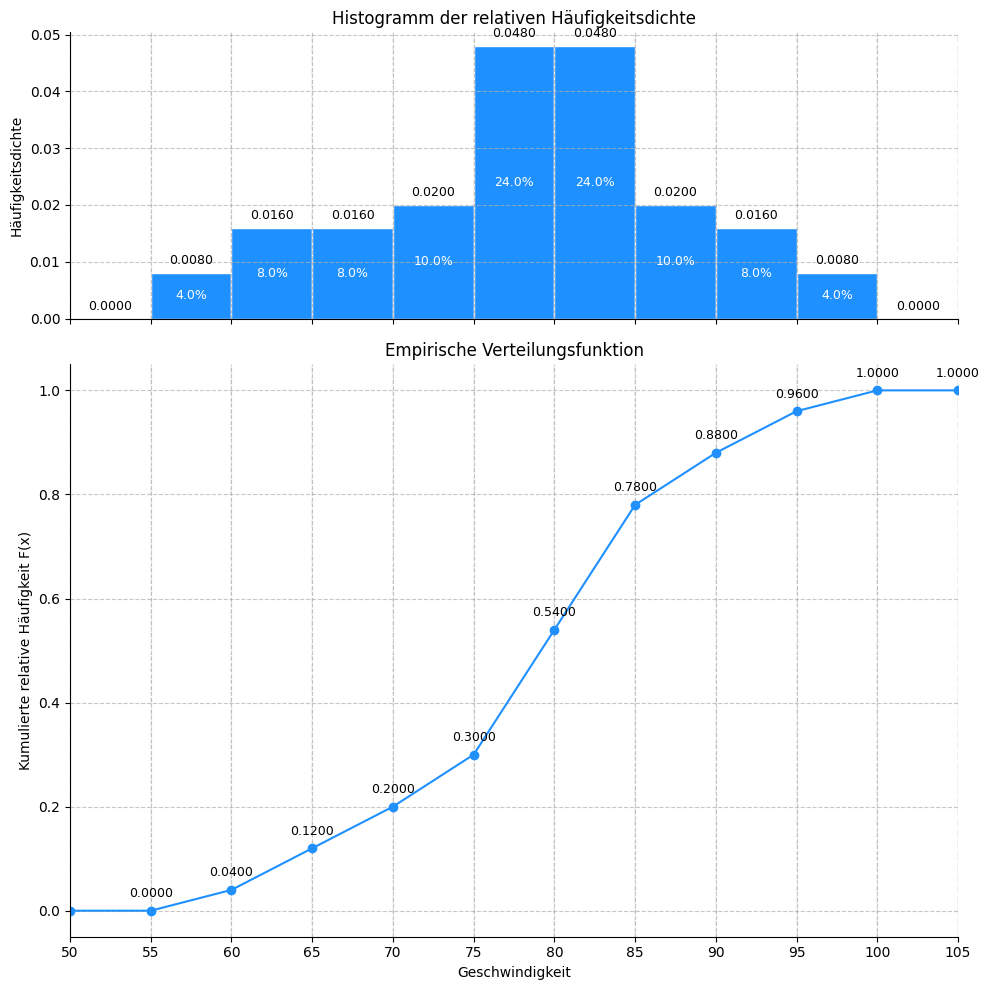

In [2]:

# Beispiel-Daten für die Funktion
class_bins = np.arange(50, 110, 5)
abs_freq = [0, 2, 4, 4, 5, 12, 12, 5, 4, 2, 0]

# Funktion ausführen
plot_empirical_cdf_with_histogram(
    class_bins=class_bins, abs_freq=abs_freq, xlabel="Geschwindigkeit", 
    ylabel_cdf="Kumulierte relative Häufigkeit F(x)", ylabel_hist="Häufigkeitsdichte",
    continuous=True
)
